<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana5/Test_estadisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

## Distribución Chi Cuadrada 

La distribución Chi cuadrada es el resultado de la suma del cuadrado de distintas variables iid con distribución normal estandarizada

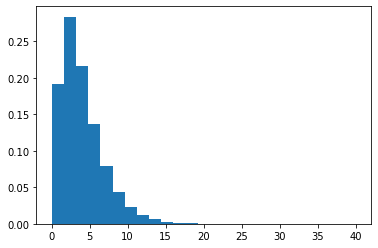

In [71]:
var_iid_gauss = {}        # diccionario que guarda variables aleatorias iid con distribución normal estandarizada 
r = 4                     # cantidad de variables iid
size = 10000000                # número de observaciones en cada variable

ji = np.zeros(size)          # vector que guardara la suma de var_iid_gauss al cuadrado

for i in range(1, r+1):
  var_iid_gauss[i] = np.random.normal( 0, 1, size)  # generamos variable aleatoria a partir de una distribución normal estandar de tamaño n
  ji += (var_iid_gauss[i]**2)

plt.hist(ji,   weights = np.ones_like(ji)/size, bins=25)
plt.show()

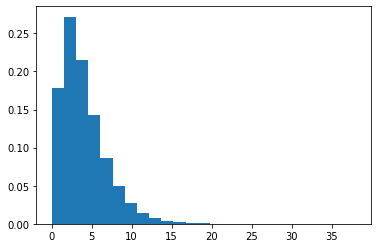

In [73]:
s =np.random.chisquare(r, size)
plt.hist(s,   weights = np.ones_like(ji)/size, bins=25)
plt.show()

In [19]:
def grafica_chi_cuadrada(a, b, c, d):
  ''''grafica la función de densidad de la distrtibución chi cuadrada para 
  los grados de libertad especificados en los parametros de entrada a, b, c y d)'''

  fig,ax = plt.subplots(1, 1)
  plt.xlim(0, 10)
  plt.ylim(0, .35)
  plt.xlabel('valores')
  plt.ylabel('frecuencia')
  plt.title('Distribución Chi cuadrada')

  x = np.linspace(0, 10, 100)
  grados_libertad = [a, b, c, d]
  linestyles = [':', '--', '-.', '-']

  for r, ls in zip(grados_libertad, linestyles):
    pdf = stats.chi2.pdf(x, r)                    # función de densidad chi2, para r grados de libertad
    ax.plot(x, pdf,  linestyle=ls)

  plt.legend(grados_libertad)
  plt.show()

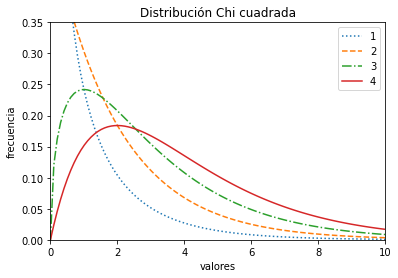

In [20]:
grafica_chi_cuadrada(1, 2, 3, 4)

# Prueba de bondad de ajuste  $\chi^2$ de Pearson

## Ejemplo:

Geisser realizó un estudio en 1889 de la distribución de hijos e hijas en las familias en Saxony con 12 hijos.
Se deseaba probar que la probabilidad de tener un hijo varon  es de 0.52


In [21]:
datos = pd.read_csv('https://www.stat.berkeley.edu/~rice/Stat135/geissler.txt')
datos.columns=['hijos_h','frec_observada']
datos

,hijos_h,frec_observada
0,0,7
1,1,45
2,2,181
3,3,478
4,4,829
5,5,1112
6,6,1343
7,7,1033
8,8,670
9,9,286


In [22]:
n = datos.frec_observada.sum()
n

6115

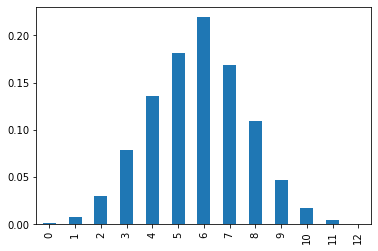

In [25]:
(datos.frec_observada/n).plot.bar()


Hipotesis nula:
- la Ley de Probabilidad sigue una distribución Binomial (12, 0.52) 
(número de éxitos r en n eventos independientes sucesivos)

Hipotesis alternativa:
- La Ley de Probabilidad es cualquier otra

In [26]:
k = 6
stats.binom.pmf(k, 12, .52)  #frecuencia esperada con la distribución binomial para cada posible resultado

0.22342895654216136

In [27]:
## Valores esperados de la hipotesis nula
frec_esperada=[]
for k in range(0,13):
  f_e= stats.binom.pmf(k, 12, .52) * n     # frecuencia esperada
  frec_esperada.append(int(round(f_e,0)))

datos['frec_esperada']=pd.Series(frec_esperada)
datos

,hijos_h,frec_observada,frec_esperada
0,0,7,1
1,1,45,12
2,2,181,71
3,3,478,256
4,4,829,624
5,5,1112,1081
6,6,1343,1366
7,7,1033,1269
8,8,670,859
9,9,286,414


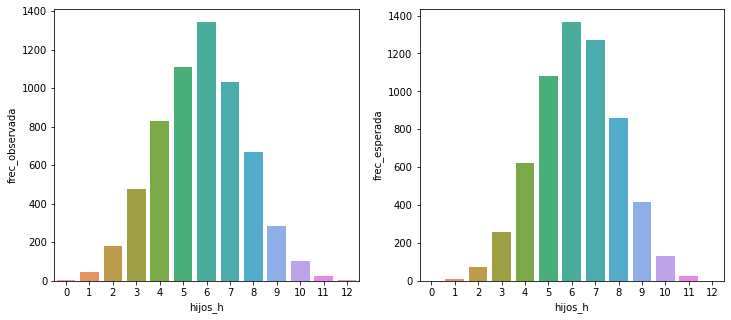

In [28]:
variables= ['frec_observada', 'frec_esperada']
fig, ax = plt.subplots(1,2, figsize=(12, 5))
for var, subplot in zip(variables, ax.flatten()):
  sns.barplot(x='hijos_h', y=var, data = datos, ax= subplot)
plt.show()

## test_chi_cuadrada()

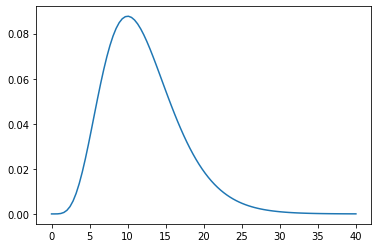

In [58]:
gl
x = np.linspace(0, 40, 100)
pdf = stats.chi2.pdf(x, gl)                    # función de densidad chi2, para r grados de libertad
plt.plot(x, pdf)
plt.show()

In [64]:
gl = 12      # grados de libertad
alfa = 0.05  # nivel de significancia

x = stats.chi2.ppf(1 - alfa , gl)  # valor crítico

![tabla chi cuadrada](https://d20ohkaloyme4g.cloudfront.net/img/document_thumbnails/d4e586470f42dcf4c1e7fd6cfa08f31a/thumb_1200_848.png)

In [67]:
def bondad_ajuste_Pearson(observados, esperados,  alfa = 0.05):
    """Test de Pearson de bondad de ajuste"""
    estadistico_test = 0  
    for observado, esperado in zip(observados,esperados):
        error = observado - esperado
        estadistico_test += pow(error, 2) / esperado
    gl = len(observados) - 1
    valor_critico = stats.chi2.ppf(1-alfa , gl)

    if estadistico_test <= valor_critico:
      print("El estadístico de la prueba NO está en la región de rechazo")
    else:
      print("El estadístico de la prueba está en la región de rechazo")

    print("\nTest Chi-squared  estadístico = {:.3f}".format(estadistico_test))
    print("Valor crítico P-value para 0.05 de significancia is {:.3f}.".format(valor_critico))    


In [68]:
bondad_ajuste_Pearson(datos['frec_observada'], datos['frec_esperada'], 0.05)

El estadístico de la prueba está en la región de rechazo

Test Chi-squared  estadístico = 690.731
Valor crítico P-value para 0.05 de significancia is 21.026.


In [47]:
stats.chisquare(datos['frec_observada'], datos['frec_esperada'], ddof=12 )

Power_divergenceResult(statistic=690.7313910429208, pvalue=nan)

# Prueba $\chi^2$ de independencia  

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ClasificadorClientesTelecom/master/Datos/WA_Fn-UseC_-Telco-Customer-Churn.csv', 
                 usecols=['PaymentMethod', 'Contract', 'gender']
                 )
df.shape

(7043, 3)

In [5]:
observados = pd.crosstab(df['PaymentMethod'], df['Contract'])
observados

Contract,Month-to-month,One year,Two year
PaymentMethod,,,
Bank transfer (automatic),589,391,564
Credit card (automatic),543,398,581
Electronic check,1850,347,168
Mailed check,893,337,382



Hipotesis nula:
- Las variables son independientes

Hipotesis alternativa:
- Las variables son dependientes



In [6]:
esperados = pd.DataFrame().reindex_like(observados)
renglones, columnas = observados.shape
for i in range(renglones):
    for j in range(columnas):
      esperados.iloc[i, j] = observados.iloc[i,:].sum()*observados.iloc[:, j].sum()/ observados.sum().sum()
esperados

Contract,Month-to-month,One year,Two year
PaymentMethod,,,
Bank transfer (automatic),849.495953,322.918075,371.585972
Credit card (automatic),837.391736,318.316910,366.291353
Electronic check,1301.203322,494.625160,569.171518
Mailed check,886.908988,337.139855,387.951157


$estadístico_{test} = \sum\frac{(Observado-Esperado)^2}{Esperado}$

In [7]:
estadistico_test = (pow((observados - esperados),2)/esperados).sum().sum()
estadistico_test

1001.5815711333701

In [8]:
gl = (renglones - 1)*(columnas -1)
alfa = 0.05
valor_critico = stats.chi2.ppf(1-alfa , gl)
valor_critico

12.591587243743977

Todo junto 

In [3]:
def prueba_independencia(col1, col2, alfa = 0.05):
    """###  Prueba Chi cuadrada independencia ###
    col1 y col2 son columnas categóricas de un mismo dataframe,
    alfa es el nivel de significancia"""
    observados = pd.crosstab(col1, col2)
    renglones, columnas = observados.shape
    esperados = pd.DataFrame().reindex_like(observados)
    renglones, columnas = observados.shape
    for i in range(renglones):
        for j in range(columnas):
          esperados.iloc[i, j] = observados.iloc[i,:].sum()*observados.iloc[:, j].sum()/ observados.sum().sum()
     
    estadistico_test = (pow((observados - esperados),2)/esperados).sum().sum()
    gl = (renglones - 1)*(columnas -1)
    valor_critico = stats.chi2.ppf(1-alfa , gl)

    if estadistico_test <= valor_critico:
      print("El estadístico de la prueba NO está en la región de rechazo")
    else:
      print("El estadístico de la prueba está en la región de rechazo")

    print("\nTest Chi-squared  estadístico = {:.3f}".format(estadistico_test))
    print("Valor crítico P-value para 0.05 de significancia is {:.3f}.".format(valor_critico))    


In [9]:
prueba_independencia(df['PaymentMethod'], df['Contract'])

El estadístico de la prueba está en la región de rechazo

Test Chi-squared  estadístico = 1001.582
Valor crítico P-value para 0.05 de significancia is 12.592.


In [18]:
prueba_independencia(df['PaymentMethod'], df['gender'], alfa=0.05)

El estadístico de la prueba NO está en la región de rechazo

Test Chi-squared  estadístico = 2.449
Valor crítico P-value para 0.05 de significancia is 6.251.


# Prueba de Kolmogorv Smirnov para variables continuas

In [45]:
import datetime
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

bitcoin = pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',
                      parse_dates=True, date_parser=dateparse, 
                      usecols=['Timestamp','Close'], index_col='Timestamp',
                      ).dropna()

bitcoin

,Close
Timestamp,
2011-12-31 07:52:00,4.39
2011-12-31 15:50:00,4.39
2011-12-31 16:59:00,4.57
2011-12-31 17:00:00,4.58
2012-01-01 04:16:00,4.58
...,...
2021-03-30 23:56:00,58686.00
2021-03-30 23:57:00,58685.81
2021-03-30 23:58:00,58723.84


In [46]:
bitcoin.index

DatetimeIndex(['2011-12-31 07:52:00', '2011-12-31 15:50:00',
               '2011-12-31 16:59:00', '2011-12-31 17:00:00',
               '2012-01-01 04:16:00', '2012-01-01 15:28:00',
               '2012-01-01 22:45:00', '2012-01-02 20:04:00',
               '2012-01-03 11:45:00', '2012-01-03 14:22:00',
               ...
               '2021-03-30 23:50:00', '2021-03-30 23:51:00',
               '2021-03-30 23:53:00', '2021-03-30 23:54:00',
               '2021-03-30 23:55:00', '2021-03-30 23:56:00',
               '2021-03-30 23:57:00', '2021-03-30 23:58:00',
               '2021-03-30 23:59:00', '2021-03-31 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=3613769, freq=None)

In [63]:
bitcoin = bitcoin.reset_index()

In [62]:
bitcoin = bitcoin.set_index('Timestamp')
bitcoin

,Close
Timestamp,
2011-12-31 07:52:00,4.39
2011-12-31 15:50:00,4.39
2011-12-31 16:59:00,4.57
2011-12-31 17:00:00,4.58
2012-01-01 04:16:00,4.58
...,...
2021-03-30 23:56:00,58686.00
2021-03-30 23:57:00,58685.81
2021-03-30 23:58:00,58723.84


In [67]:
precio = bitcoin.resample('D', on ='Timestamp').Close.mean()

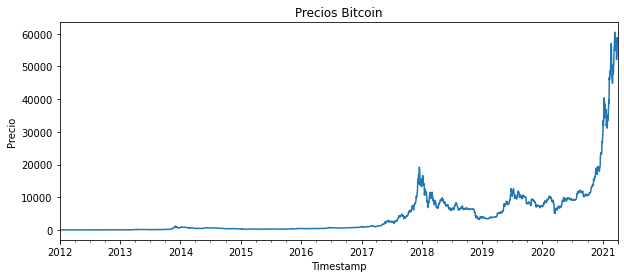

In [68]:
precio.plot(figsize=(10,4), title='Precios Bitcoin', ylabel = 'Precio',)

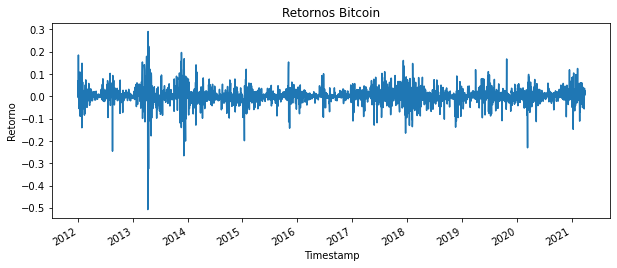

In [81]:
retorno = np.log(precio).diff().dropna()
retorno.plot(figsize=(10,4), title='Retornos Bitcoin', ylabel = 'Retorno')

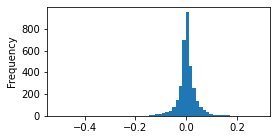

In [82]:
plt.rc("figure", figsize=(4,2))
retorno.plot.hist(bins=60)
plt.show()

In [84]:
stats.kstest(retorno, 'laplace')

KstestResult(statistic=0.4414169578171818, pvalue=0.0)

Se rechaza la ho

# Recursos

* https://seeing-theory.brown.edu/frequentist-inference/index.html

* https://rpsychologist.com/d3/ci/